
# Singular Value Decompositon

Here I am writing down information and running examples as I am learning about SVD.

## Theory

All matrices can be represented as a rotation, followed by a stretching, followed by another rotation.
![SVD Image](https://upload.wikimedia.org/wikipedia/commons/b/bb/Singular-Value-Decomposition.svg)
[Image by user Georg-Johann on Wikipedia.](https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular-Value-Decomposition.svg)

We can then write the decomposition of the matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=\begin{bmatrix}
\vert & \vert &  & \vert\\
\boldsymbol{x}_1 & \boldsymbol{x}_2 & \dots & \boldsymbol{x}_m\\
\vert & \vert &  & \vert
\end{bmatrix}
=
\boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V}^\top
=
\begin{bmatrix}
\vert & \vert &  & \vert\\
\boldsymbol{u}_1 & \boldsymbol{u}_2 & \dots & \boldsymbol{u}_n\\
\vert & \vert &  & \vert
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & &  & \\
& \sigma_2 & & \\
& & \ddots & \\
& & & \sigma_m \\
\boldsymbol{0}&\boldsymbol{0}&\boldsymbol{0}&\boldsymbol{0} \\
\end{bmatrix}
\begin{bmatrix}
\vert & \vert &  & \vert\\
\boldsymbol{v}_1 & \boldsymbol{v}_2 & \dots & \boldsymbol{v}_m\\
\vert & \vert &  & \vert
\end{bmatrix}^\top
$$

Where $\boldsymbol{U} \in \mathbb{R}^{n \times n}$, $\boldsymbol{S} \in \mathbb{R}^{n \times m}$ and $\boldsymbol{V} \in \mathbb{R}^{m \times m}$.

Sigma is being diagonal since it is just doing a stretching operation. It is also ordered so that $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_m$.

We can then see that $\boldsymbol{X}$ can be written as a sum of rank 1 matrices:

$$
\boldsymbol{X} = \sigma_1 \boldsymbol{u}_1 \boldsymbol{v}_1^\top + \sigma_2 \boldsymbol{u}_2 \boldsymbol{v}_2^\top + \dots + \sigma_m \boldsymbol{u}_m \boldsymbol{v}_m^\top
$$

Every term you add increased the rank of the matrix by one. If the original matrix $\boldsymbol{X}$ is of rank $r<n$ then all the $\sigma_i$ where $i>r$ are equal to $0$.


Idea: If the last sigmas are very small, then we could set them to $0$ and thus reduce the rank of the matrix while still loosing very little information. Define $\tilde{\boldsymbol{\Sigma}}$ as $\boldsymbol{\Sigma}$ with the last elements set to $0$.

According to the Eckart-Young-Mirsky Theorem, the best rank $r$ approximation of a matrix w.r.t the forbenius norm is the trunkated SVD.

$$
\text{argmin}_{\tilde{\boldsymbol{X}} \text{ s.t. rank}(\tilde{\boldsymbol{X}}) = r} ||\boldsymbol{X}-\tilde{\boldsymbol{X}}||_F = \boldsymbol{U} \tilde{\boldsymbol{\Sigma}} \boldsymbol{V}^\top
$$

Where the forbenius norm is just the square root of the sum of all elements in a matrix squared.

$$||\boldsymbol{A}||_F = \sqrt{\sum_{i,j} A_{i,j}^2}$$


 ## SVD example
 Lets see an example of the SVD with a heart
 ### Plotting heart
 Heart taken from [this video](https://www.youtube.com/watch?v=DG7YTlGnCEo).


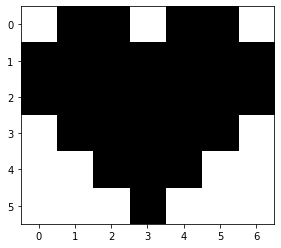

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fig(fig, canvas=plt):
    canvas.imshow(1-fig, cmap='gray', vmin=0, vmax=1)

heart = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]])

plot_fig(heart)

 ### Running Singular value decomposition on the heart picture.


In [2]:
from numpy.linalg import svd


U, S, V = svd(heart)
print(f'The shape of U: {U.shape}')
print(f'The shape of S: {S.shape}')
print(f'The shape of V: {V.shape}')

def get_terms(U,S,V):

    parts = []
    for i in range(len(S)):
        part = S[i]*np.outer(U[:,i], V[i])
        parts.append(part)

    return parts

from numpy import cumsum

parts_heart = get_terms(U,S,V)
parts_heart_compounding = cumsum(parts_heart, axis=0)

The shape of U: (6, 6)
The shape of S: (6,)
The shape of V: (7, 7)



 ## Plotting svd of heart picture
 The top row is the SVD parts and the bottom row is the sum of all previous parts

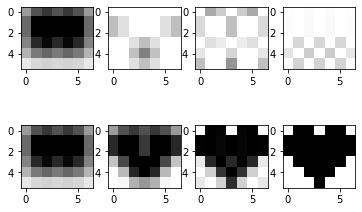

In [3]:
figure, axis = plt.subplots(2, 4)

plot_fig(parts_heart[0], axis[0, 0])
plot_fig(parts_heart[1], axis[0, 1])
plot_fig(parts_heart[2], axis[0, 2])
plot_fig(parts_heart[3], axis[0, 3])

plot_fig(parts_heart_compounding[0], axis[1, 0])
plot_fig(parts_heart_compounding[1], axis[1, 1])
plot_fig(parts_heart_compounding[2], axis[1, 2])
plot_fig(parts_heart_compounding[3], axis[1, 3])

 ## SVD face example
 Lets try another example with a much bigger matrix. 

  ### Downloading faces


In [4]:
from sklearn.datasets import fetch_olivetti_faces

faces, _ = fetch_olivetti_faces(return_X_y=True)

faces = faces.T

print(f'The shape of faces: {faces.shape}')

The shape of faces: (4096, 400)



 The faces are a matrix of height 4096 and width 400. Each column in the matrix a 64x64 face. When we plot the faces we must thus reshape them

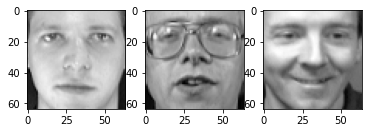

In [5]:
def plot_face(face, canvas=plt):
    canvas.imshow(face.reshape(64,64), cmap='gray')


figure, axis = plt.subplots(1, 3)
plot_face(faces[:,0], axis[0])
plot_face(faces[:, 10], axis[1])
plot_face(faces[:, 20], axis[2])

 ### Theory
 If we do SVD of the face matrix we get

$$
 \begin{bmatrix}
 \vert & \vert &  & \vert\\
 \boldsymbol{u}_1 & \boldsymbol{u}_2 & \dots & \boldsymbol{u}_n\\
 \vert & \vert &  & \vert
 \end{bmatrix}
 \begin{bmatrix}
 \sigma_1 & &  & \\
  & \sigma_2 & & \\
  & & \ddots & \\
 & & & \sigma_m \\
 \boldsymbol{0}&\boldsymbol{0}&\boldsymbol{0}&\boldsymbol{0} \\
 \end{bmatrix}
 \begin{bmatrix}
 \text{---}\hspace{-0.2cm} & \boldsymbol{v}_1^\top & \hspace{-0.2cm} \text{---} \\
 \text{---}\hspace{-0.2cm} & \boldsymbol{v}_2^\top & \hspace{-0.2cm} \text{---} \\
 & \vdots &  \\
 \text{---}\hspace{-0.2cm} & \boldsymbol{v}_m^\top & \hspace{-0.2cm} \text{---}
 \end{bmatrix}
=
 \sigma_1 \boldsymbol{u}_1 \boldsymbol{v}_1^\top + \sigma_2 \boldsymbol{u}_2 \boldsymbol{v}_2^\top + \dots + \sigma_m \boldsymbol{u}_m \boldsymbol{v}_m^\top
$$

 Where each term $\sigma_i \boldsymbol{u}_i \boldsymbol{v}_i^\top$ is the outer product of $\boldsymbol{u}_i$ and $\boldsymbol{v}_i$. Note that $\boldsymbol{u}_i$ has the same shape as a face. Thus each u can be seen as an "eigenface". Each face can be seen as a linear combination of these "eighenfaces". Each column in $\boldsymbol{V}^\top$ describes how much of each eigenface is required for each face.

 So $\boldsymbol{u}_1$ is the most important component of the faces and $\boldsymbol{v}_1^\top$ says how much of that component each face uses.

 ### Results
 Running SVD on the face matrix.

In [6]:
U, S, V = svd(faces)
print(f'The shape of U: {U.shape}')
print(f'The shape of S: {S.shape}')
print(f'The shape of V: {V.shape}')


The shape of U: (4096, 4096)
The shape of S: (400,)
The shape of V: (400, 400)


Finding the terms and the cumulative sum of them.

In [7]:
parts_faces = get_terms(U,S,V)
parts_faces_compounding = cumsum(parts_faces, axis=0)


 The first of the compounding faces are all the same. This is because they are all just slightly differently scaled versions of $\boldsymbol{u}_1$.


In [8]:
parts_faces_compounding[0].shape

(4096, 400)

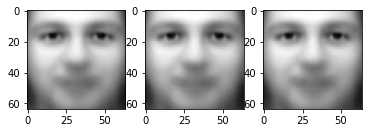

In [9]:
figure, axis = plt.subplots(1, 3)

plot_face(parts_faces_compounding[0][:,0], axis[0])
plot_face(parts_faces_compounding[0][:,10], axis[1])
plot_face(parts_faces_compounding[0][:,20], axis[2])


But if we take the first face at different compound-levels. We can see that it approaches the first face.

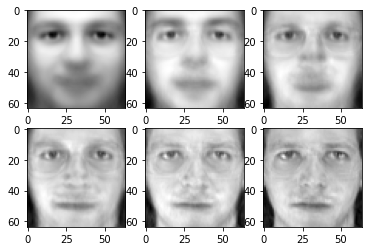

In [10]:
figure, axis = plt.subplots(2, 3)

plot_face(parts_faces_compounding[1][:,0], axis[0,0])
plot_face(parts_faces_compounding[5][:,0], axis[0,1])
plot_face(parts_faces_compounding[10][:,0], axis[0,2])
plot_face(parts_faces_compounding[50][:,0], axis[1,0])
plot_face(parts_faces_compounding[100][:,0], axis[1,1])
plot_face(parts_faces_compounding[200][:,0], axis[1,2])

### Rank comparison
Since we have a rank of 400

In [11]:
print(len(parts_faces_compounding))

400


We can see that half of that seems good enough to see the original face with hardly any difference. Lets compare the faces of the face matrix truncated at 200 with the original faces. (Top truncated, bottom original.)

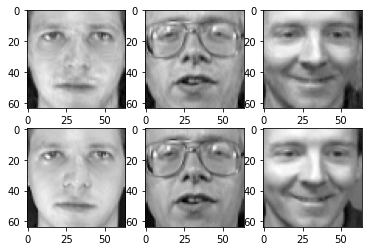

In [12]:
figure, axis = plt.subplots(2, 3)

plot_face(parts_faces_compounding[200][:,0], axis[0,0])
plot_face(parts_faces_compounding[200][:,10], axis[0,1])
plot_face(parts_faces_compounding[200][:,20], axis[0,2])
plot_face(faces[:,0], axis[1,0])
plot_face(faces[:,10], axis[1,1])
plot_face(faces[:,20], axis[1,2])

### Looking at the eigenfaces



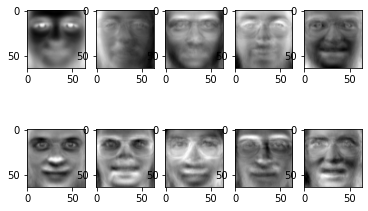

In [13]:
figure, axis = plt.subplots(2, 5)

for i in range(2):
    for j in range(5):
        plot_face(U[:,i*5+j], axis[i,j])


The (inverse of the) first eigenface is very similar to the mean face.

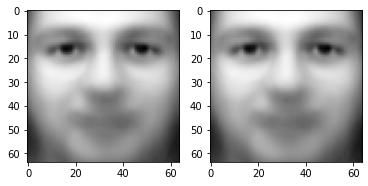

In [14]:
figure, axis = plt.subplots(1, 2)

mean_face = faces.mean(axis=1)

plot_face(mean_face, axis[0])
plot_face(-U[:,0], axis[1])

This makes sense since the first eigenface is the most important term used. You can also subtract the mean face before running the SVD as in [this video](https://www.youtube.com/watch?v=yYdYrAKghF4) to have the data mean-centered.

 ## Sources and further information about SVD
 I used these sources when learning about the SVD:
 * [Singular Value Decomposition (SVD): Mathematical Overview](https://www.youtube.com/watch?v=nbBvuuNVfco) - Steve Brunton
 * [Singular Value Decomposition (SVD): Matrix Approximation](https://www.youtube.com/watch?v=xy3QyyhiuY4) - Steve Brunton
 * [Singular Value Decomposition (the SVD)](https://www.youtube.com/watch?v=mBcLRGuAFUk) -  MIT OpenCourseWare
 * [Singular Value Decomposition (SVD) and Image Compression](https://www.youtube.com/watch?v=DG7YTlGnCEo) - Serrano.Academy
 * [The Eckart-Young-Mirsky Theorem](https://mipals.github.io/pubs/matrix/eckart_young_mirsky/) - Mikkel Paltorp